In [6]:
import numpy as np
np.__version__

'1.20.3'

In [7]:
import pandas as pd
pd.__version__

'1.3.4'

In [8]:
import matplotlib as mp
mp.__version__

'3.4.3'

In [9]:
import sklearn
sklearn.__version__

'0.24.2'

In [10]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
X= data['area']
y = data['price']

In [12]:
# Splitting and Normalization

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
RandomState = 42

In [15]:
#Splitting of training and testing data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = RandomState)

In [17]:
np.save("X_train.npy",X_train)
np.save("X_test.npy",X_test)
np.save("y_train.npy",y_train)
np.save("y_test.npy",y_test)

In [18]:
#Normalization

In [19]:
X_train = np.asarray(X_train).reshape(-1,1)
X_test = np.asarray(X_test).reshape(-1,1)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Normalized = scaler.transform(X_train)

In [21]:
X_test_Normalized = scaler.transform(X_test)


In [22]:
X_test_Normalized

array([[ 0.33875048],
       [ 0.61125674],
       [-0.5060189 ],
       [-0.0700089 ],
       [-0.54235307],
       [ 0.7111757 ],
       [ 1.52869446],
       [-0.07455067],
       [-0.86936058],
       [-1.11461621],
       [ 1.55594508],
       [-0.55416168],
       [-0.65135557],
       [-0.93294537],
       [-0.5378113 ],
       [-0.69223151],
       [-1.43254017],
       [ 0.38416819],
       [ 0.31604163],
       [ 0.38416819],
       [-0.06092536],
       [ 0.75886429],
       [-0.68360215],
       [-0.61502141],
       [ 1.40606664],
       [ 2.18270947],
       [-0.93748714],
       [-0.97836308],
       [ 3.65424324],
       [-0.97836308],
       [-0.52418599],
       [-0.92386183],
       [ 0.38416819],
       [ 0.6634871 ],
       [-0.17219874],
       [-0.25167973],
       [-0.23078759],
       [-0.8966112 ],
       [-0.76035808],
       [-1.0751028 ],
       [ 1.28343883],
       [-0.69223151],
       [ 0.57492257],
       [-0.43335057],
       [ 0.72480101],
       [ 0

In [23]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [24]:
 with open(r'C:\Users\student\Desktop\scaler.pkl','rb') as f:
         sc = pickle.load(f)

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_Normalized, y_train)
Score = reg.score(X_train_Normalized, y_train)
CoEfficient = reg.coef_
Intercept = reg.intercept_


In [26]:
 Predictions = reg.predict(X_test_Normalized)


In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test, Predictions)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_test, Predictions) #default=True
rmse = mean_squared_error(y_test, Predictions,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 1474748.1337969352
MSE: 3675286604768.1855
RMSE: 1917103.7021424235


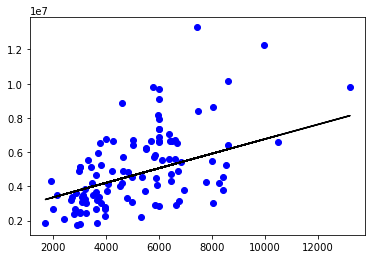

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, Predictions, color ='k')
plt.show()


In [29]:
pickle.dump(reg, open("model.pkl", "wb"))